In [9]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import datasets, layers, models

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

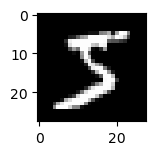

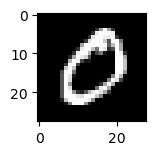

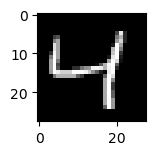

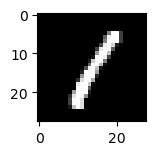

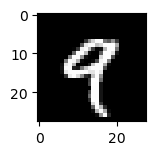

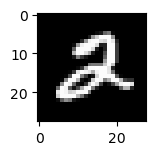

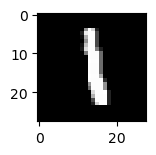

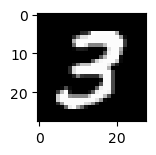

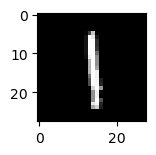

In [11]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
    plt.show()

In [12]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [13]:
x_train_est = x_train/255.0
x_test_est = x_test/255.0

feature_columns = [tf.feature_column.numeric_column('x', shape=x_train_est.shape[1:])]
x_train_est.shape[1:]

(28, 28, 1)

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train_est, y_train, epochs=10, 
                    validation_data=(x_test_est, y_test))

Epoch 1/10
   7/1875 [..............................] - ETA: 15s - loss: 2.2757 - accuracy: 0.1339 

2022-12-02 18:47:01.879836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.1507 - accuracy: 0.9528

2022-12-02 18:47:15.739939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 15s 8ms/step - loss: 0.1507 - accuracy: 0.9528 - val_loss: 0.0556 - val_accuracy: 0.9817
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0475 - accuracy: 0.9849 - val_loss: 0.0360 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0278 - val_accuracy: 0.9912
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0328 - val_accuracy: 0.9901
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0284 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0312 - val_accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0378 - val_accuracy: 0.9

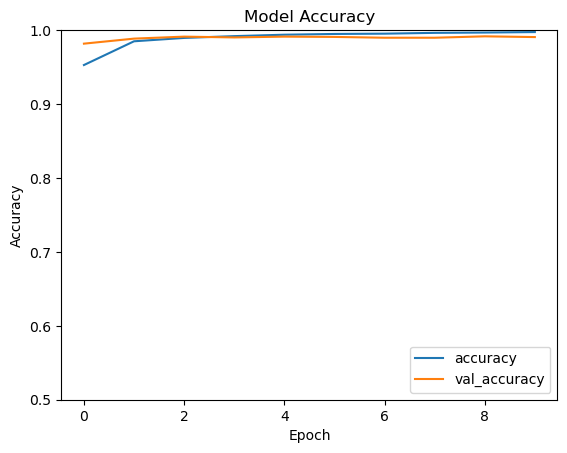

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Model Accuracy')
plt.legend(loc='lower right')

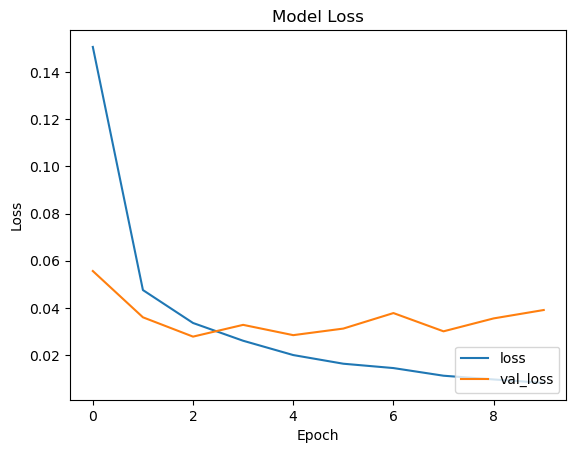

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(loc='lower right')

In [18]:
test_loss, test_acc = model.evaluate(x_test_est,  y_test, verbose=2)

313/313 - 1s - loss: 0.0391 - accuracy: 0.9906 - 1s/epoch - 5ms/step


In [19]:
print(test_acc)

0.990600049495697


In [26]:
predictions = model.predict(x_test_est)
predictions = np.argmax(predictions, axis=1)

 63/313 [=====>........................] - ETA: 0s

2022-12-02 18:54:59.697714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


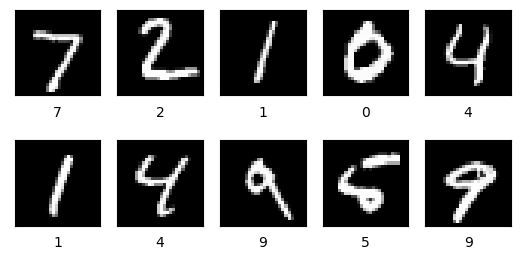

In [39]:
for i in range(10):
    plt.subplot(3,5,i+1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(x_test_est[i], cmap='gray')
    plt.xlabel(predictions[i])